#### Import libraries

In [64]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import random
import pprint

import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

#### Import dataframe

In [2]:
df = pd.read_csv('all_music_data.csv')
df

,Unnamed: 0,song_title,artist,id,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Hey Ya!,Outkast,0JFx4l1JZJ6XtMAtlCMiqF,0.657,0.883,4,-6.778,0,0.0526,...,0.000000,0.3060,0.966,79.397,audio_features,spotify:track:0JFx4l1JZJ6XtMAtlCMiqF,https://api.spotify.com/v1/tracks/0JFx4l1JZJ6X...,https://api.spotify.com/v1/audio-analysis/0JFx...,228573,4
1,1,"No Woman, No Cry",Fugees,5bUVHuzQh5mkvMPjUU074i,0.846,0.326,0,-13.909,1,0.1520,...,0.000040,0.2800,0.367,88.988,audio_features,spotify:track:5bUVHuzQh5mkvMPjUU074i,https://api.spotify.com/v1/tracks/5bUVHuzQh5mk...,https://api.spotify.com/v1/audio-analysis/5bUV...,273093,4
2,2,Can You Feel It,The Jacksons,1XqgxhR3FcJXzFiSG8m6oL,0.892,0.638,6,-7.468,0,0.0488,...,0.000476,0.2020,0.892,125.359,audio_features,spotify:track:1XqgxhR3FcJXzFiSG8m6oL,https://api.spotify.com/v1/tracks/1XqgxhR3FcJX...,https://api.spotify.com/v1/audio-analysis/1Xqg...,358373,4
3,3,Foolish,Ashanti,5wXgj9h0Pc36Rcgwf2qd7A,0.620,0.701,0,-5.742,1,0.0624,...,0.000000,0.1470,0.771,90.059,audio_features,spotify:track:5wXgj9h0Pc36Rcgwf2qd7A,https://api.spotify.com/v1/tracks/5wXgj9h0Pc36...,https://api.spotify.com/v1/audio-analysis/5wXg...,229013,4
4,4,Arigato Interlude,Ms. Lauryn Hill,3abz5HTatP9iv5p8Nm5IT0,0.000,0.978,10,-9.615,1,0.0000,...,0.002280,0.9510,0.000,0.000,audio_features,spotify:track:3abz5HTatP9iv5p8Nm5IT0,https://api.spotify.com/v1/tracks/3abz5HTatP9i...,https://api.spotify.com/v1/audio-analysis/3abz...,34182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,7312,XO,John Mayer,0hm785gGfLmHvl9YesZcFP,0.431,0.377,2,-9.753,1,0.0288,...,0.000000,0.2110,0.353,173.670,audio_features,spotify:track:0hm785gGfLmHvl9YesZcFP,https://api.spotify.com/v1/tracks/0hm785gGfLmH...,https://api.spotify.com/v1/audio-analysis/0hm7...,213627,4
7313,7313,Un-Break My Heart,Toni Braxton,5CYbKUBECU71XChJBP01KE,0.620,0.417,11,-9.166,0,0.0286,...,0.000000,0.0984,0.133,109.904,audio_features,spotify:track:5CYbKUBECU71XChJBP01KE,https://api.spotify.com/v1/tracks/5CYbKUBECU71...,https://api.spotify.com/v1/audio-analysis/5CYb...,271467,4
7314,7314,God Is a DJ,Faithless,76QhWAnwj7aSgAYPOPNXYN,0.604,0.893,10,-7.480,0,0.0453,...,0.900000,0.1570,0.366,130.555,audio_features,spotify:track:76QhWAnwj7aSgAYPOPNXYN,https://api.spotify.com/v1/tracks/76QhWAnwj7aS...,https://api.spotify.com/v1/audio-analysis/76Qh...,207613,4
7315,7315,I Wanna Be Adored - Remastered,The Stone Roses,5vnMGVPld0mhqVVHMK89y3,0.502,0.860,4,-9.251,0,0.0278,...,0.240000,0.2160,0.559,112.585,audio_features,spotify:track:5vnMGVPld0mhqVVHMK89y3,https://api.spotify.com/v1/tracks/5vnMGVPld0mh...,https://api.spotify.com/v1/audio-analysis/5vnM...,292413,4


In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df

,song_title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Hey Ya!,Outkast,0JFx4l1JZJ6XtMAtlCMiqF,0.657,0.883,4,-6.778,0,0.0526,0.0349,0.000000,0.3060,0.966,79.397,audio_features,spotify:track:0JFx4l1JZJ6XtMAtlCMiqF,https://api.spotify.com/v1/tracks/0JFx4l1JZJ6X...,https://api.spotify.com/v1/audio-analysis/0JFx...,228573,4
1,"No Woman, No Cry",Fugees,5bUVHuzQh5mkvMPjUU074i,0.846,0.326,0,-13.909,1,0.1520,0.0134,0.000040,0.2800,0.367,88.988,audio_features,spotify:track:5bUVHuzQh5mkvMPjUU074i,https://api.spotify.com/v1/tracks/5bUVHuzQh5mk...,https://api.spotify.com/v1/audio-analysis/5bUV...,273093,4
2,Can You Feel It,The Jacksons,1XqgxhR3FcJXzFiSG8m6oL,0.892,0.638,6,-7.468,0,0.0488,0.0445,0.000476,0.2020,0.892,125.359,audio_features,spotify:track:1XqgxhR3FcJXzFiSG8m6oL,https://api.spotify.com/v1/tracks/1XqgxhR3FcJX...,https://api.spotify.com/v1/audio-analysis/1Xqg...,358373,4
3,Foolish,Ashanti,5wXgj9h0Pc36Rcgwf2qd7A,0.620,0.701,0,-5.742,1,0.0624,0.3160,0.000000,0.1470,0.771,90.059,audio_features,spotify:track:5wXgj9h0Pc36Rcgwf2qd7A,https://api.spotify.com/v1/tracks/5wXgj9h0Pc36...,https://api.spotify.com/v1/audio-analysis/5wXg...,229013,4
4,Arigato Interlude,Ms. Lauryn Hill,3abz5HTatP9iv5p8Nm5IT0,0.000,0.978,10,-9.615,1,0.0000,0.7990,0.002280,0.9510,0.000,0.000,audio_features,spotify:track:3abz5HTatP9iv5p8Nm5IT0,https://api.spotify.com/v1/tracks/3abz5HTatP9i...,https://api.spotify.com/v1/audio-analysis/3abz...,34182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,XO,John Mayer,0hm785gGfLmHvl9YesZcFP,0.431,0.377,2,-9.753,1,0.0288,0.7490,0.000000,0.2110,0.353,173.670,audio_features,spotify:track:0hm785gGfLmHvl9YesZcFP,https://api.spotify.com/v1/tracks/0hm785gGfLmH...,https://api.spotify.com/v1/audio-analysis/0hm7...,213627,4
7313,Un-Break My Heart,Toni Braxton,5CYbKUBECU71XChJBP01KE,0.620,0.417,11,-9.166,0,0.0286,0.4150,0.000000,0.0984,0.133,109.904,audio_features,spotify:track:5CYbKUBECU71XChJBP01KE,https://api.spotify.com/v1/tracks/5CYbKUBECU71...,https://api.spotify.com/v1/audio-analysis/5CYb...,271467,4
7314,God Is a DJ,Faithless,76QhWAnwj7aSgAYPOPNXYN,0.604,0.893,10,-7.480,0,0.0453,0.1750,0.900000,0.1570,0.366,130.555,audio_features,spotify:track:76QhWAnwj7aSgAYPOPNXYN,https://api.spotify.com/v1/tracks/76QhWAnwj7aS...,https://api.spotify.com/v1/audio-analysis/76Qh...,207613,4
7315,I Wanna Be Adored - Remastered,The Stone Roses,5vnMGVPld0mhqVVHMK89y3,0.502,0.860,4,-9.251,0,0.0278,0.0123,0.240000,0.2160,0.559,112.585,audio_features,spotify:track:5vnMGVPld0mhqVVHMK89y3,https://api.spotify.com/v1/tracks/5vnMGVPld0mh...,https://api.spotify.com/v1/audio-analysis/5vnM...,292413,4


In [5]:
df.isnull().values.any()

False

In [6]:
df.shape

(7317, 20)

#### Categorical and Numerical

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_title        7317 non-null   object 
 1   artist            7317 non-null   object 
 2   id                7317 non-null   object 
 3   danceability      7317 non-null   float64
 4   energy            7317 non-null   float64
 5   key               7317 non-null   int64  
 6   loudness          7317 non-null   float64
 7   mode              7317 non-null   int64  
 8   speechiness       7317 non-null   float64
 9   acousticness      7317 non-null   float64
 10  instrumentalness  7317 non-null   float64
 11  liveness          7317 non-null   float64
 12  valence           7317 non-null   float64
 13  tempo             7317 non-null   float64
 14  type              7317 non-null   object 
 15  uri               7317 non-null   object 
 16  track_href        7317 non-null   object 


In [8]:
df_fl = df.select_dtypes("float64")

In [9]:
df_fl

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.657,0.883,-6.778,0.0526,0.0349,0.000000,0.3060,0.966,79.397
1,0.846,0.326,-13.909,0.1520,0.0134,0.000040,0.2800,0.367,88.988
2,0.892,0.638,-7.468,0.0488,0.0445,0.000476,0.2020,0.892,125.359
3,0.620,0.701,-5.742,0.0624,0.3160,0.000000,0.1470,0.771,90.059
4,0.000,0.978,-9.615,0.0000,0.7990,0.002280,0.9510,0.000,0.000
...,...,...,...,...,...,...,...,...,...
7312,0.431,0.377,-9.753,0.0288,0.7490,0.000000,0.2110,0.353,173.670
7313,0.620,0.417,-9.166,0.0286,0.4150,0.000000,0.0984,0.133,109.904
7314,0.604,0.893,-7.480,0.0453,0.1750,0.900000,0.1570,0.366,130.555
7315,0.502,0.860,-9.251,0.0278,0.0123,0.240000,0.2160,0.559,112.585


In [10]:
mode = df['mode']

In [11]:
key = df['key']

In [12]:
time_signature = df['time_signature']

In [13]:
duration_ms = df['duration_ms']

In [14]:
df_fl = df_fl.join(mode)

In [15]:
df_fl = df_fl.join(key)

In [16]:
df_fl = df_fl.join(time_signature)

In [17]:
df_fl = df_fl.join(duration_ms)

In [18]:
df_fl

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,key,time_signature,duration_ms
0,0.657,0.883,-6.778,0.0526,0.0349,0.000000,0.3060,0.966,79.397,0,4,4,228573
1,0.846,0.326,-13.909,0.1520,0.0134,0.000040,0.2800,0.367,88.988,1,0,4,273093
2,0.892,0.638,-7.468,0.0488,0.0445,0.000476,0.2020,0.892,125.359,0,6,4,358373
3,0.620,0.701,-5.742,0.0624,0.3160,0.000000,0.1470,0.771,90.059,1,0,4,229013
4,0.000,0.978,-9.615,0.0000,0.7990,0.002280,0.9510,0.000,0.000,1,10,0,34182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,0.431,0.377,-9.753,0.0288,0.7490,0.000000,0.2110,0.353,173.670,1,2,4,213627
7313,0.620,0.417,-9.166,0.0286,0.4150,0.000000,0.0984,0.133,109.904,0,11,4,271467
7314,0.604,0.893,-7.480,0.0453,0.1750,0.900000,0.1570,0.366,130.555,0,10,4,207613
7315,0.502,0.860,-9.251,0.0278,0.0123,0.240000,0.2160,0.559,112.585,0,4,4,292413


In [19]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7.317000e+03,7317.000000
mean,0.587391,0.607030,5.295476,-8.326448,0.634960,0.091835,0.285053,0.044119,0.208400,0.533108,114.581336,2.428530e+05,3.913489
std,0.168777,0.221907,3.588778,3.553579,0.481474,0.111609,0.300661,0.161981,0.181537,0.253073,29.171158,9.051329e+04,0.399945
min,0.000000,0.001140,0.000000,-40.230000,0.000000,0.000000,0.000008,0.000000,0.015700,0.000000,0.000000,8.867000e+03,0.000000
25%,0.473000,0.462000,2.000000,-9.753000,0.000000,0.033100,0.039300,0.000000,0.096200,0.328000,93.010000,2.049470e+05,4.000000
50%,0.602000,0.628000,5.000000,-7.727000,1.000000,0.044700,0.156000,0.000008,0.134000,0.549000,108.873000,2.376530e+05,4.000000
75%,0.714000,0.784000,8.000000,-6.077000,1.000000,0.091200,0.469000,0.000716,0.268000,0.739000,130.618000,2.692670e+05,4.000000
max,0.969000,0.998000,11.000000,-1.492000,1.000000,0.948000,0.996000,0.964000,0.994000,0.985000,216.160000,4.650486e+06,5.000000


In [20]:
#key, loudness, tempo, duration
#we need to scale

#### Scaling

In [21]:
scaler = StandardScaler()
scaler.fit(df_fl)
df_scaled = scaler.transform(df_fl)
df_scaled_df = pd.DataFrame(df_scaled, columns = df_fl.columns)
display(df_fl.head())
print()
display(df_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,key,time_signature,duration_ms
0,0.657,0.883,-6.778,0.0526,0.0349,0.000000,0.306,0.966,79.397,0,4,4,228573
1,0.846,0.326,-13.909,0.1520,0.0134,0.000040,0.280,0.367,88.988,1,0,4,273093
2,0.892,0.638,-7.468,0.0488,0.0445,0.000476,0.202,0.892,125.359,0,6,4,358373
3,0.620,0.701,-5.742,0.0624,0.3160,0.000000,0.147,0.771,90.059,1,0,4,229013
4,0.000,0.978,-9.615,0.0000,0.7990,0.002280,0.951,0.000,0.000,1,10,0,34182


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,key,time_signature,duration_ms
0,0.412458,1.243718,0.435773,-0.351565,-0.832068,-0.272392,0.537669,1.710659,-1.206217,-1.318872,-0.361004,0.216322,-0.157778
1,1.532356,-1.266519,-1.571073,0.539105,-0.903582,-0.272147,0.394438,-0.656408,-0.877411,0.758224,-1.475666,0.216322,0.334117
2,1.804924,0.139574,0.241589,-0.385614,-0.800136,-0.269454,-0.035256,1.418233,0.369488,-1.318872,0.196326,0.216322,1.276364
3,0.193218,0.423497,0.727330,-0.263752,0.102935,-0.272392,-0.338245,0.940078,-0.840694,0.758224,-1.475666,0.216322,-0.152916
4,-3.480523,1.671855,-0.362632,-0.822885,1.709504,-0.258316,4.090906,-2.106681,-3.928167,0.758224,1.310988,-9.785735,-2.305576


#### Clustering

In [22]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(df_scaled_df)

KMeans(n_clusters=3, random_state=1234)

In [23]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

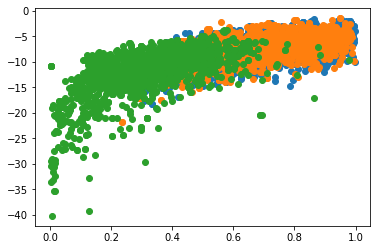

In [24]:
# assign a cluster to each example
labels = kmeans.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df_fl.to_numpy()[row_ix, 1], df_fl.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [25]:
clusters = kmeans.predict(df_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    3336
1    2266
2    1715
dtype: int64

In [26]:
#X_df = pd.DataFrame(X)
df_fl["cluster"] = clusters
df_fl

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,key,time_signature,duration_ms,cluster
0,0.657,0.883,-6.778,0.0526,0.0349,0.000000,0.3060,0.966,79.397,0,4,4,228573,1
1,0.846,0.326,-13.909,0.1520,0.0134,0.000040,0.2800,0.367,88.988,1,0,4,273093,0
2,0.892,0.638,-7.468,0.0488,0.0445,0.000476,0.2020,0.892,125.359,0,6,4,358373,1
3,0.620,0.701,-5.742,0.0624,0.3160,0.000000,0.1470,0.771,90.059,1,0,4,229013,0
4,0.000,0.978,-9.615,0.0000,0.7990,0.002280,0.9510,0.000,0.000,1,10,0,34182,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,0.431,0.377,-9.753,0.0288,0.7490,0.000000,0.2110,0.353,173.670,1,2,4,213627,2
7313,0.620,0.417,-9.166,0.0286,0.4150,0.000000,0.0984,0.133,109.904,0,11,4,271467,1
7314,0.604,0.893,-7.480,0.0453,0.1750,0.900000,0.1570,0.366,130.555,0,10,4,207613,1
7315,0.502,0.860,-9.251,0.0278,0.0123,0.240000,0.2160,0.559,112.585,0,4,4,292413,1


In [27]:
kmeans.inertia_

73107.89442525376

In [28]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(df_scaled_df)
print(kmeans2.inertia_)

30414.897083449825


#### choosing K: elbow method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



([<matplotlib.axis.XTick at 0x7ff8542a1070>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

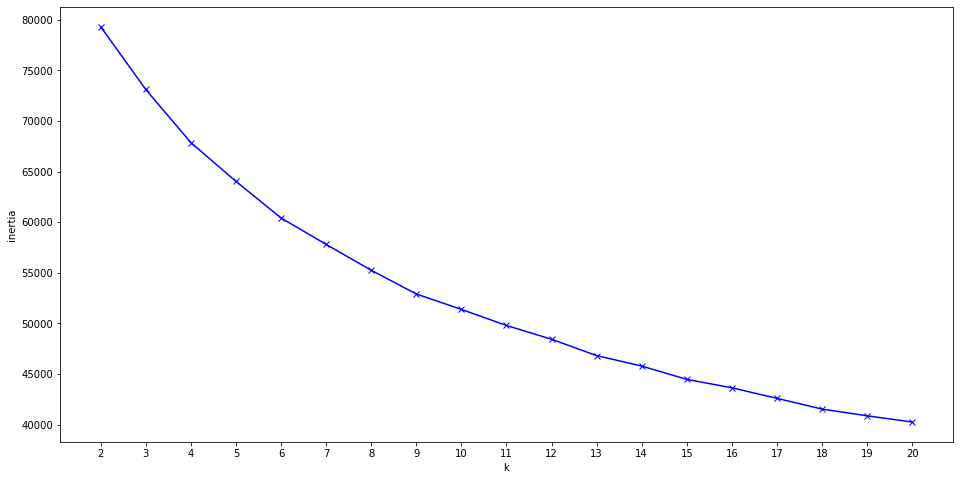

In [29]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))

#### Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

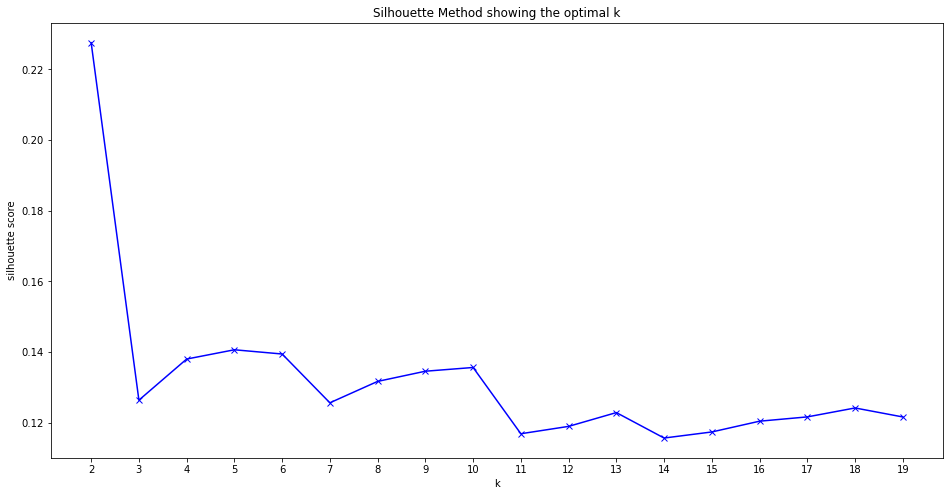

In [30]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    

    
    silhouette.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [31]:
kmeans3 = KMeans(n_clusters=6, random_state=1234)
kmeans3.fit(df_scaled_df)

KMeans(n_clusters=6, random_state=1234)

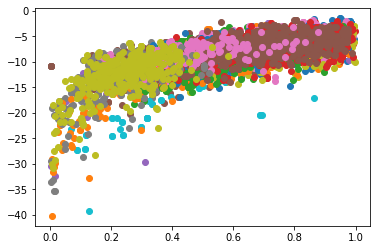

In [32]:
# assign a cluster to each example
labels = kmeans.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df_fl.to_numpy()[row_ix, 1], df_fl.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [33]:
kmeans3.inertia_

60414.925213354734

In [34]:
import seaborn as sns

In [35]:
#sns.boxplot kmeans3 / df_scaled_df

SyntaxError: invalid syntax (1795683862.py, line 1)

#### Putting the data together 

In [36]:
hot_songs = pd.read_csv("top_100_songs.csv")

In [37]:
hot_songs.drop(['Unnamed: 0'], axis = 1, inplace= True)

In [38]:
hot_songs

,name,artist
0,we don't talk about bruno,"carolina gaitan, mauro castillo, adassa, rhenz..."
1,do we have a problem?,nicki minaj x lil baby
2,easy on me,adele
3,heat waves,glass animals
4,stay,the kid laroi & justin bieber
...,...,...
95,iffy,chris brown
96,when i'm gone,alesso / katy perry
97,fair trade,drake featuring travis scott
98,megan's piano,megan thee stallion


In [58]:
for song in hot_songs[["name","artist"]].iterrows():
    user_input = input("Write down a song title: ")
    if user_input.lower() in list(hot_songs["name"]):
        random_song = random.choice(hot_songs["name"])
        song_artist = hot_songs.loc[hot_songs["name"] == random_song, "artist"].values[0]
        
        print("You may also like this song: ", random_song, "from", song_artist)
        print("Thanks for using the music recommender.")
        break

    elif user_input not in hot_songs[["name","artist"]].iterrows():
        print(" the song is not in the hot list!")
        continue

Write down a song title: isla bonita
 the song is not in the hot list!
Write down a song title: la isla bonita
 the song is not in the hot list!


KeyboardInterrupt: Interrupted by user

In [52]:
import config 
#Initialize SpotiPy with user credential

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.c_id,
                                                           client_secret= config.c_se))

In [59]:
results = sp.search(q= user_input,limit=1,market="GB")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=la+isla+bonita&type=track&market=GB&offset=0&limit=1',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6tbjWDEIzxoDsBA1FuhfPW'},
       'href': 'https://api.spotify.com/v1/artists/6tbjWDEIzxoDsBA1FuhfPW',
       'id': '6tbjWDEIzxoDsBA1FuhfPW',
       'name': 'Madonna',
       'type': 'artist',
       'uri': 'spotify:artist:6tbjWDEIzxoDsBA1FuhfPW'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/6fmnT17jc2Sc69q3nza1eD'},
     'href': 'https://api.spotify.com/v1/albums/6fmnT17jc2Sc69q3nza1eD',
     'id': '6fmnT17jc2Sc69q3nza1eD',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b2737136940d1367fb6514ec9b4f',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e027136940d1367fb6514ec9b4f',
       'width': 300},
      {'height': 64,
       'url': 'https://i

In [60]:
track_id=results['tracks']['items'][0]['external_urls']["spotify"][31:]
track_id

'6r8k1vznHrzlEKYxL4dZEe'

In [61]:
from IPython.display import IFrame


IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [ ]:
### Getting uri

In [66]:
pprint.pprint(results['tracks']['items'][0]['uri'])
results["tracks"]["items"][0]["uri"]

'spotify:track:6r8k1vznHrzlEKYxL4dZEe'


'spotify:track:6r8k1vznHrzlEKYxL4dZEe'

In [ ]:
### Getting the audio features for the input song

In [69]:
input_song = sp.audio_features(results["tracks"]["items"][0]["uri"])[0]

In [70]:
input_song

{'danceability': 0.724,
 'energy': 0.822,
 'key': 1,
 'loudness': -4.374,
 'mode': 0,
 'speechiness': 0.0333,
 'acousticness': 0.304,
 'instrumentalness': 1.38e-05,
 'liveness': 0.0553,
 'valence': 0.964,
 'tempo': 99.9,
 'type': 'audio_features',
 'id': '6r8k1vznHrzlEKYxL4dZEe',
 'uri': 'spotify:track:6r8k1vznHrzlEKYxL4dZEe',
 'track_href': 'https://api.spotify.com/v1/tracks/6r8k1vznHrzlEKYxL4dZEe',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6r8k1vznHrzlEKYxL4dZEe',
 'duration_ms': 242733,
 'time_signature': 4}

In [76]:
input_song = pd.DataFrame([input_song]) # turn the features into a data frame to add it as a column

In [77]:
df["cluster"]= kmeans3.predict(input_song)

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- analysis_url
- id
- track_href
- type
- uri
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'audio_features'

In [78]:
input_song

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.724,0.822,1,-4.374,0,0.0333,0.304,0.000014,0.0553,0.964,99.9,audio_features,6r8k1vznHrzlEKYxL4dZEe,spotify:track:6r8k1vznHrzlEKYxL4dZEe,https://api.spotify.com/v1/tracks/6r8k1vznHrzl...,https://api.spotify.com/v1/audio-analysis/6r8k...,242733,4


In [ ]:
### Next step: get rid of the "extra" columns from the audio features of the song  so that the son and the cluster match